In [9]:
import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans

import plotly.express as px
import hvplot.pandas

In [10]:
file_path = "Resources/new_iris_data.csv"
df_iris = pd.read_csv(file_path)
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
# Initializing model with K = 3 (since we already know there are three classes of iris plants)
model = KMeans(n_clusters=3, random_state=5)
model

KMeans(n_clusters=3, random_state=5)

In [12]:
# Fitting model
model.fit(df_iris)

KMeans(n_clusters=3, random_state=5)

In [13]:
# Get the predictions
predictions = model.predict(df_iris)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [14]:
# Add a new class column to the df_iris
df_iris["class"] = model.labels_
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [15]:
# Create a scatterplot of df_iris
df_iris.hvplot.scatter(x="sepal_length", y="sepal_width", by="class")

:NdOverlay   [class]
   :Scatter   [sepal_length]   (sepal_width)

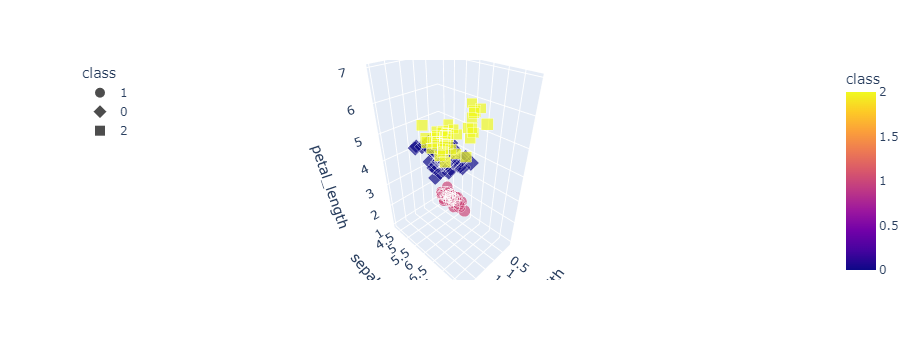

In [17]:
# Plotting the clusters with three features
fig = px.scatter_3d(
    df_iris, 
    x="petal_width", 
    y="sepal_length", 
    z="petal_length", 
    color="class", 
    symbol="class", 
    size="sepal_width",
    width=800)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()